## 전처리 및 EDA 진행

In [1]:
#필요한 패키지 import
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
warnings.filterwarnings('ignore')

In [2]:
#데이터 로드 및 체크
data = pd.read_csv('IBM_HR_Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.info()
#실제론 category 컬럼인데, int형으로 되어있는 컬럼 발견

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#int형 컬럼들을 category 컬럼으로 변환
change_dict = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
data.replace({'Education': change_dict}, inplace=True)
data['Education'].unique()

change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'EnvironmentSatisfaction': change_dict}, inplace=True)
data['EnvironmentSatisfaction'].unique()

change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobInvolvement': change_dict}, inplace=True)
data['JobInvolvement'].unique()

change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobSatisfaction': change_dict}, inplace=True)
data['JobSatisfaction'].unique()

change_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
data.replace({'PerformanceRating': change_dict}, inplace=True)
data['PerformanceRating'].unique()

change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'RelationshipSatisfaction': change_dict}, inplace=True)
data['RelationshipSatisfaction'].unique()

change_dict = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
data.replace({'WorkLifeBalance': change_dict}, inplace=True)
data['WorkLifeBalance'].unique()

data = data.astype({'JobLevel': object, 'StockOptionLevel': object, 'NumCompaniesWorked': object})
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2


In [5]:
#EDA 과정을 하기 위해 object 형식으로 잘 변환됐는지 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

## 결측치와 이상치 검토

In [6]:
#결측치 확인
data.isnull().sum()
#data.isna().sum()
#총 1470 데이터 중에 null 데이터는 없는것을 확인할 수 있음

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#(부가적 코드)'응답없음(00)'과 '알 수 없음(99)'를 가지는 변수 찾기
columns_with_00_or_99 = []

for col in data.columns:
    if (data[col] == 0).any() or (data[col] == 99).any():
        columns_with_00_or_99.append(col)

print("Variables containing '응답없음(00)' or '알 수 없음(99)':", columns_with_00_or_99)

for col in columns_with_00_or_99:
    print("Variable:", col)
    print(data[col].value_counts())
    print()

Variables containing '응답없음(00)' or '알 수 없음(99)': ['HourlyRate', 'NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Variable: HourlyRate
HourlyRate
66    29
98    28
42    28
48    28
84    28
      ..
31    15
53    14
68    14
38    13
34    12
Name: count, Length: 71, dtype: int64

Variable: NumCompaniesWorked
NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

Variable: StockOptionLevel
StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

Variable: TotalWorkingYears
TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14

In [10]:
#연속형 변수 찾기
continuous_variables = []
for column in data.columns:
    if data[column].dtype != object:
        continuous_variables.append(column)
        
print("연속형 변수개수:", len(continuous_variables))

연속형 변수개수: 16


In [9]:
#평균과 표준편차 수치로 이상치 검토
z_scores = pd.DataFrame()

for col in continuous_variables:
    mean = data[col].mean()
    std_dev = data[col].std()
    z_scores[col] = (data[col] - mean) / std_dev

outliers = abs(z_scores) > 2.45
outlier_columns = outliers.columns[outliers.any()]
print("이상치가 있는 변수명:", outlier_columns)
print("이상치가 있는 변수개수:", len(outlier_columns))

이상치가 있는 변수명: Index(['Age', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
이상치가 있는 변수개수: 9


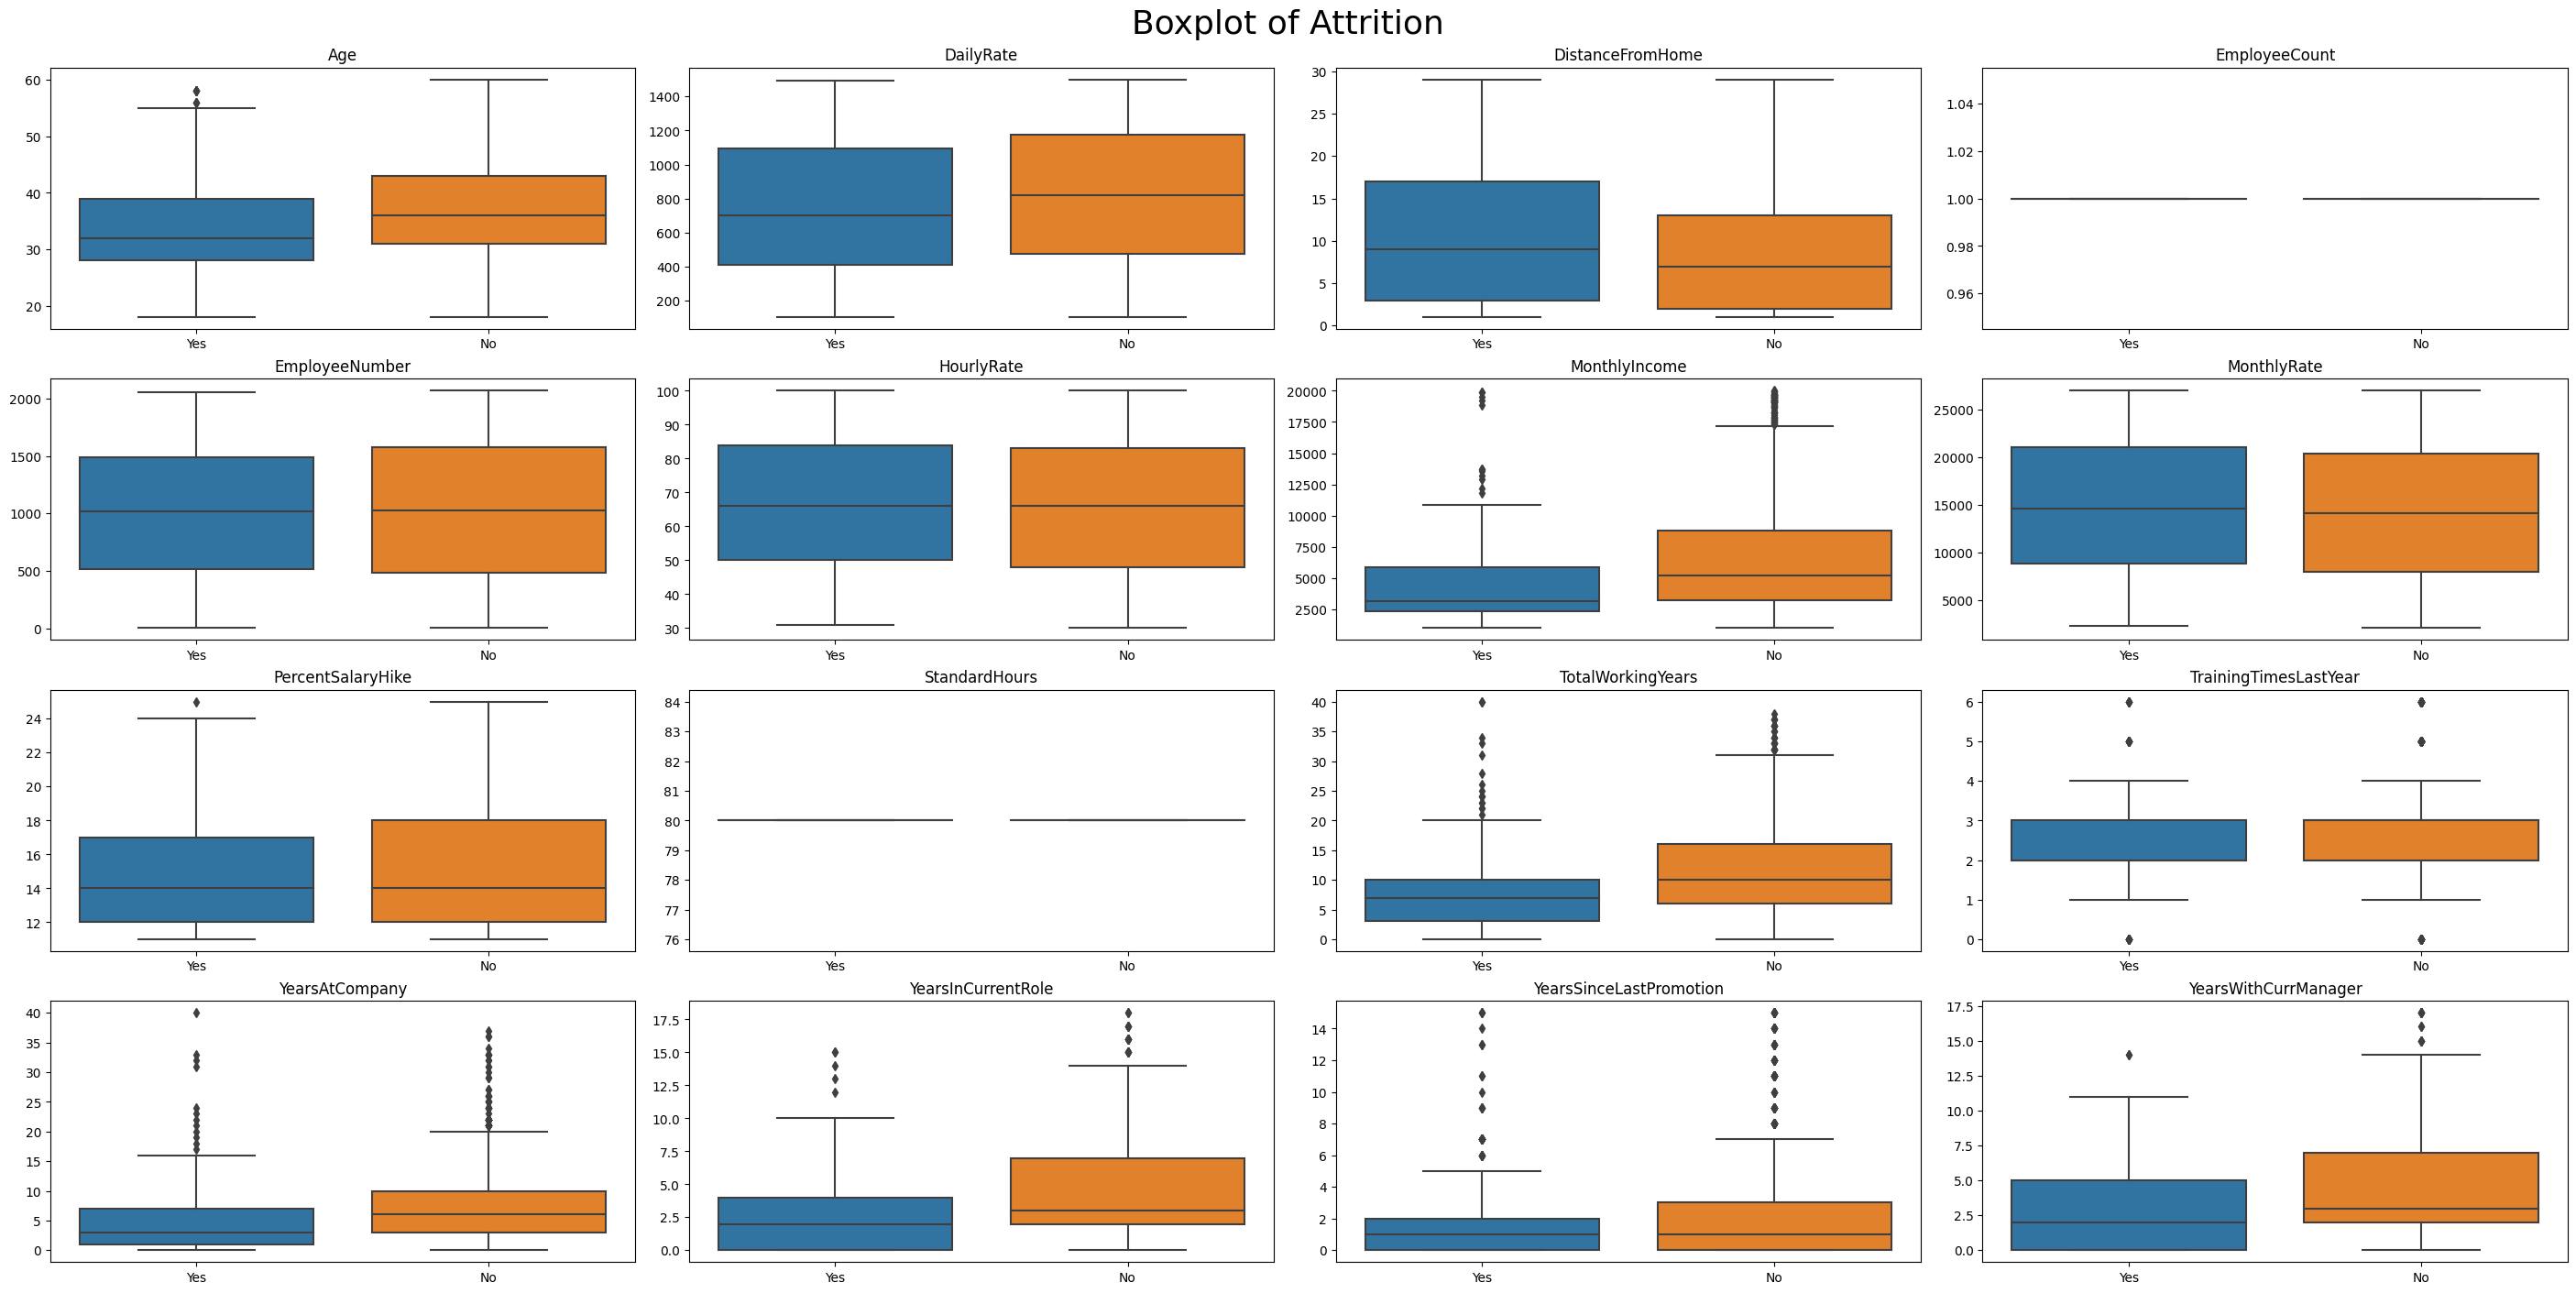

In [11]:
#박스플롯으로 이상치 검토
fig, ax = plt.subplots(4, 4, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Attrition', fontsize=26)

for i in range(len(continuous_variables)):
    ax[i].set(title = continuous_variables[i])
    sns.boxplot(x=data['Attrition'], y = data[continuous_variables[i]], ax=ax[i]).set(xlabel=None,  ylabel=None)
    
plt.show()

In [12]:
#분석 및 예측에 필요 없는 변수 삭제
continuous_variables.remove('EmployeeNumber')
continuous_variables.remove('StandardHours')
continuous_variables.remove('EmployeeCount')
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)

## 유의미한 시각화 5개

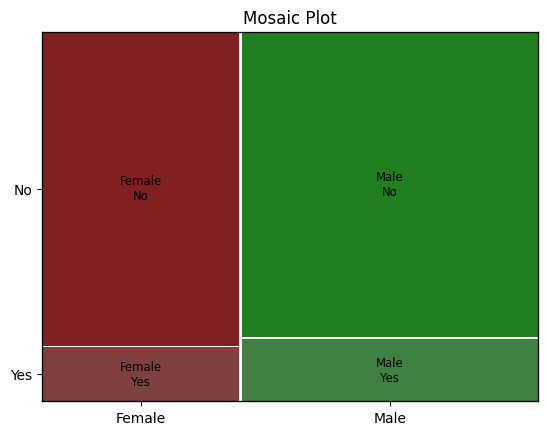

In [13]:
#시각화1 : 모자이크플롯
mosaic(data, ['Gender', 'Attrition'], title='Mosaic Plot')

plt.show()
#전체적으로 남성의 합격률이 여성보다 높다는 것을 알 수 있음

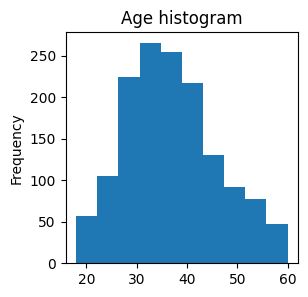

In [14]:
#시각화2 : 히스토그램
plt.figure(figsize=(3,3))
plt.title('Age histogram')
data['Age'].plot(kind = 'hist')

plt.show()
#직원의 나이 분포를 쉽게 파악할 수 있음

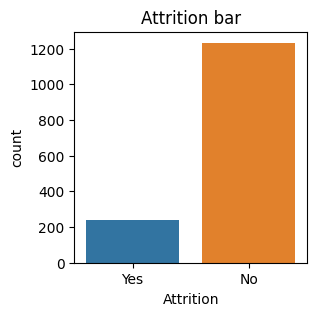

In [15]:
#시각화3 : 막대그래프
plt.figure(figsize = (3,3))
sns.countplot(x = data['Attrition'])
plt.title('Attrition bar')

plt.show()
#퇴사자의 분포가 전체 데이터의 약 16%를 차지하는 걸 확인할 수 있음

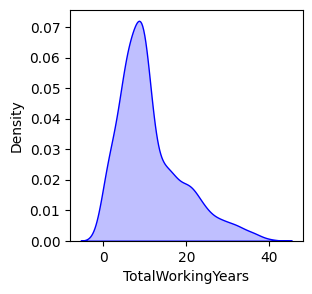

In [16]:
#시각화4 : 밀도그래프
plt.figure(figsize = (3,3))
fig.suptitle('TotalWorkingYears density', fontsize=16)
sns.kdeplot(data.TotalWorkingYears, color='blue', shade=True)

plt.show()
#경력이 짧을때 퇴사를 많이 함을 알 수 있음

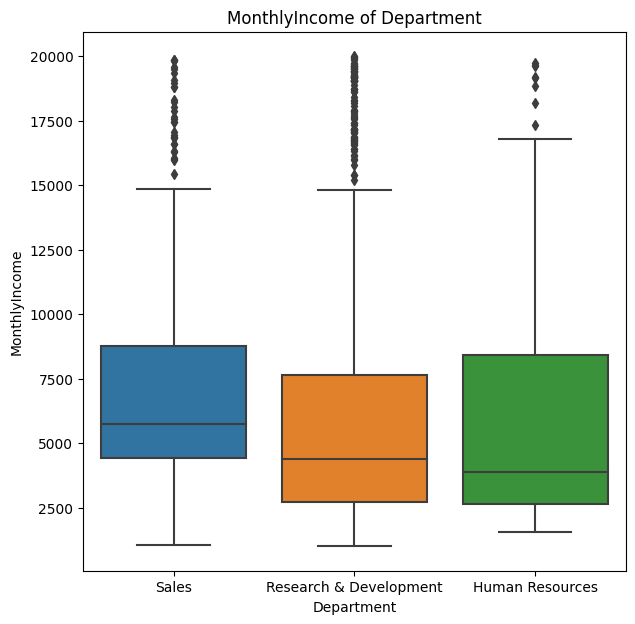

In [17]:
#시각화5 : 박스플롯
plt.figure(figsize=(7, 7))
plt.title('MonthlyIncome of Department')
sns.boxplot(x='Department', y='MonthlyIncome', data=data)

plt.show()
#근무 부서별로 월 수입 차이가 많이 나는지 확인해본 결과 Sales를 제외하고 나머지 두 부서는 큰 차이가 없어 보임을 알 수 있음

## 수치형 변수 간 상관관계 파악

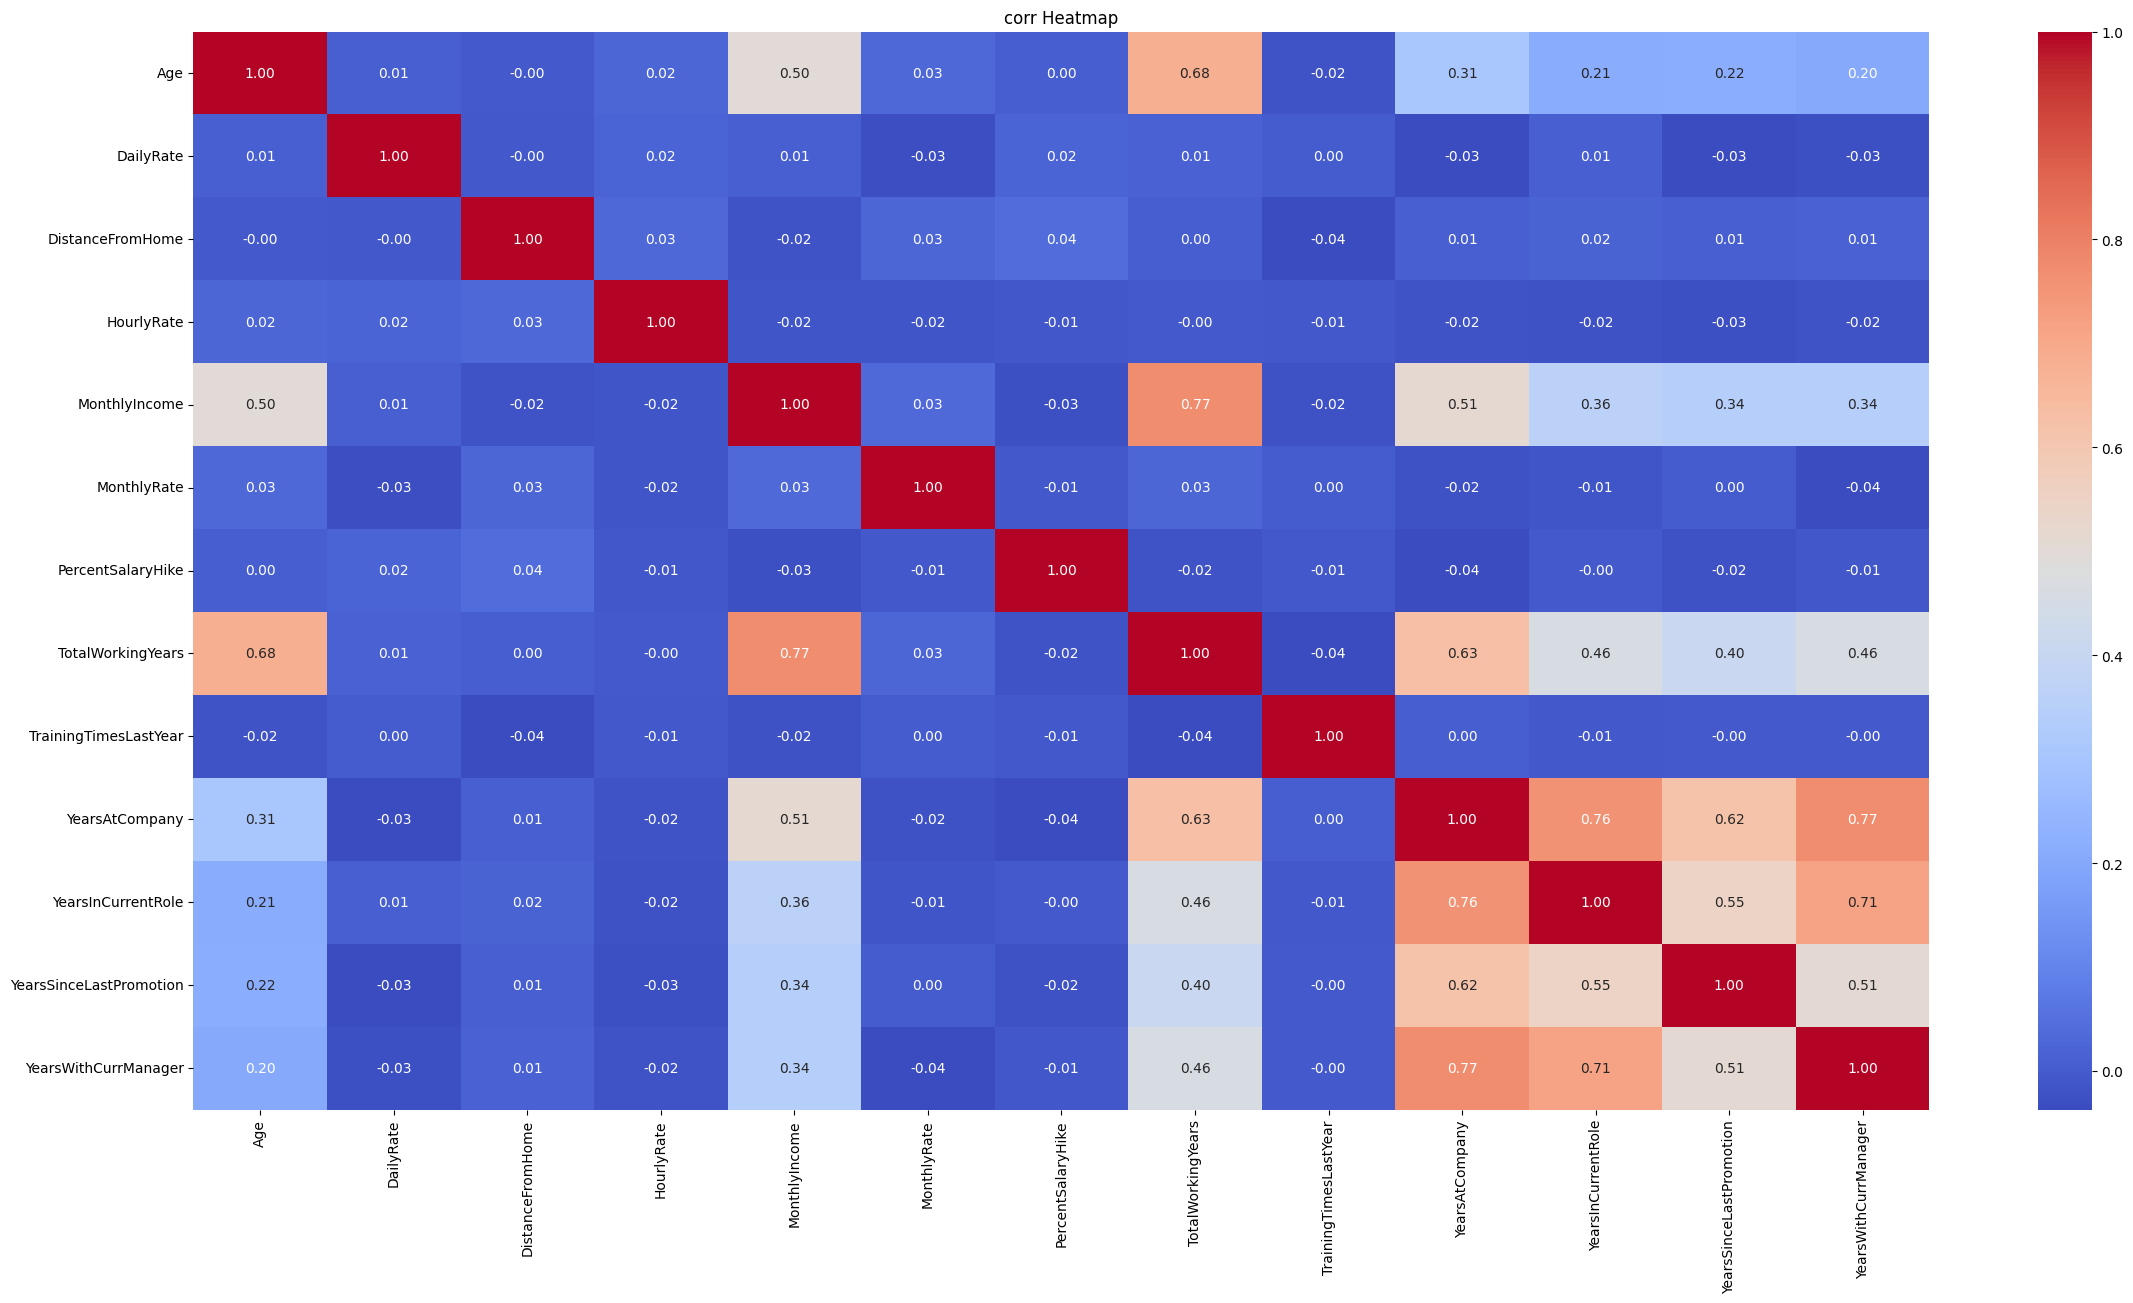

In [18]:
#상관계수 히트맵
correlation_matrix = data[continuous_variables].corr()
plt.figure(figsize=(28, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('corr Heatmap')

plt.show()

## 파생변수 생성

In [20]:
#파생변수1 : 승진까지 남은 시간
data['TimeToPromotion'] = data['YearsAtCompany'] - data['YearsInCurrentRole']

In [22]:
#파생변수2 : 연봉증감률
data['SalaryGrowthRate'] = (data['MonthlyIncome'] - data['MonthlyIncome'].shift(1)) / data['MonthlyIncome'].shift(1)

In [24]:
#파생변수가 잘 생성되었는지 확인 
print(data[['YearsAtCompany', 'YearsInCurrentRole', 'TimeToPromotion']].head())
print(data[['MonthlyIncome', 'SalaryGrowthRate']].head())

   YearsAtCompany  YearsInCurrentRole  TimeToPromotion
0               6                   4                2
1              10                   7                3
2               0                   0                0
3               8                   7                1
4               2                   2                0
   MonthlyIncome  SalaryGrowthRate
0           5993               NaN
1           5130         -0.144001
2           2090         -0.592593
3           2909          0.391866
4           3468          0.192162
